In [2]:
import numpy as np
import pandas as pd
import os
import xml.etree.ElementTree as ET
import keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
print(os.listdir("Internship/"))

['annot_chem4', 'images_chem4']


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
annotations = os.listdir("Internship/annot_chem4/")
annotations

['akhand_b43_0.xml',
 'akhand_b43_1.xml',
 'akhand_b43_10.xml',
 'akhand_b43_100.xml',
 'akhand_b43_101.xml',
 'akhand_b43_102.xml',
 'akhand_b43_103.xml',
 'akhand_b43_104.xml',
 'akhand_b43_105.xml',
 'akhand_b43_106.xml',
 'akhand_b43_107.xml',
 'akhand_b43_108.xml',
 'akhand_b43_109.xml',
 'akhand_b43_11.xml',
 'akhand_b43_110.xml',
 'akhand_b43_111.xml',
 'akhand_b43_112.xml',
 'akhand_b43_113.xml',
 'akhand_b43_114.xml',
 'akhand_b43_115.xml',
 'akhand_b43_116.xml',
 'akhand_b43_117.xml',
 'akhand_b43_118.xml',
 'akhand_b43_119.xml',
 'akhand_b43_12.xml',
 'akhand_b43_120.xml',
 'akhand_b43_121.xml',
 'akhand_b43_122.xml',
 'akhand_b43_123.xml',
 'akhand_b43_124.xml',
 'akhand_b43_125.xml',
 'akhand_b43_126.xml',
 'akhand_b43_127.xml',
 'akhand_b43_128.xml',
 'akhand_b43_129.xml',
 'akhand_b43_13.xml',
 'akhand_b43_130.xml',
 'akhand_b43_131.xml',
 'akhand_b43_132.xml',
 'akhand_b43_133.xml',
 'akhand_b43_134.xml',
 'akhand_b43_135.xml',
 'akhand_b43_136.xml',
 'akhand_b43_137.xm

In [5]:
path_annot = "Internship/annot_chem4/"
path_annot

'Internship/annot_chem4/'

In [6]:
path_images = "Internship/images_chem4/"
path_images

'Internship/images_chem4/'

In [7]:
helping_dict = {}
for i in range(len(annotations)):
    helping_dict[i] = 0
helping_dict

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [8]:
for i in range(len(annotations)):
    temp_dict = {}
    et = ET.parse(os.path.join(path_annot,annotations[i]))
    for j in et.iter():
        if j.tag == 'filename':
            temp_dict['FileLoc'] = os.path.join(path_images,j.text)
            temp_dict['FileName'] = j.text
            continue
        if j.tag == 'name':
            temp_dict['DamageType'] = j.text
    helping_dict[i] = temp_dict

In [9]:
helping_dict

{0: {'FileLoc': 'Internship/images_chem4/akhand_b43_0.jpg',
  'FileName': 'akhand_b43_0.jpg',
  'DamageType': 'Shatter'},
 1: {'FileLoc': 'Internship/images_chem4/akhand_b43_1.jpg',
  'FileName': 'akhand_b43_1.jpg',
  'DamageType': 'Shatter'},
 2: {'FileLoc': 'Internship/images_chem4/akhand_b43_10.jpg',
  'FileName': 'akhand_b43_10.jpg',
  'DamageType': 'Large_tear_or_damage'},
 3: {'FileLoc': 'Internship/images_chem4/akhand_b43_100.jpg',
  'FileName': 'akhand_b43_100.jpg',
  'DamageType': 'Scratch_or_spot'},
 4: {'FileLoc': 'Internship/images_chem4/akhand_b43_101.jpg',
  'FileName': 'akhand_b43_101.jpg',
  'DamageType': 'Scratch_or_spot'},
 5: {'FileLoc': 'Internship/images_chem4/akhand_b43_102.jpg',
  'FileName': 'akhand_b43_102.jpg',
  'DamageType': 'Dislocation'},
 6: {'FileLoc': 'Internship/images_chem4/akhand_b43_103.jpg',
  'FileName': 'akhand_b43_103.jpg',
  'DamageType': 'Tear'},
 7: {'FileLoc': 'Internship/images_chem4/akhand_b43_104.jpg',
  'FileName': 'akhand_b43_104.jpg',


In [10]:
data = pd.DataFrame(helping_dict)
data = data.T

In [11]:
data.head(10)

,DamageType,FileLoc,FileName
0,Shatter,Internship/images_chem4/akhand_b43_0.jpg,akhand_b43_0.jpg
1,Shatter,Internship/images_chem4/akhand_b43_1.jpg,akhand_b43_1.jpg
2,Large_tear_or_damage,Internship/images_chem4/akhand_b43_10.jpg,akhand_b43_10.jpg
3,Scratch_or_spot,Internship/images_chem4/akhand_b43_100.jpg,akhand_b43_100.jpg
4,Scratch_or_spot,Internship/images_chem4/akhand_b43_101.jpg,akhand_b43_101.jpg
5,Dislocation,Internship/images_chem4/akhand_b43_102.jpg,akhand_b43_102.jpg
6,Tear,Internship/images_chem4/akhand_b43_103.jpg,akhand_b43_103.jpg
7,Shatter,Internship/images_chem4/akhand_b43_104.jpg,akhand_b43_104.jpg
8,Shatter,Internship/images_chem4/akhand_b43_105.jpg,akhand_b43_105.jpg
9,Scratch_or_spot,Internship/images_chem4/akhand_b43_106.jpg,akhand_b43_106.jpg


In [12]:
data.shape

(601, 3)

In [13]:
unique_damages = data['DamageType'].unique()

In [14]:
unique_damages

array(['Shatter', 'Large_tear_or_damage', 'Scratch_or_spot',
       'Dislocation', 'Tear', 'Dent', 'Large_dent', nan], dtype=object)

In [15]:
data['DamageType'].value_counts()

Scratch_or_spot         164
Dent                    113
Dislocation              87
Large_tear_or_damage     73
Tear                     68
Shatter                  53
Large_dent                2
Name: DamageType, dtype: int64

In [16]:
data_2 = data[data['DamageType'].isin(['Scratch_or_spot','Dent'])]
data_2.head()

,DamageType,FileLoc,FileName
3,Scratch_or_spot,Internship/images_chem4/akhand_b43_100.jpg,akhand_b43_100.jpg
4,Scratch_or_spot,Internship/images_chem4/akhand_b43_101.jpg,akhand_b43_101.jpg
9,Scratch_or_spot,Internship/images_chem4/akhand_b43_106.jpg,akhand_b43_106.jpg
12,Dent,Internship/images_chem4/akhand_b43_109.jpg,akhand_b43_109.jpg
13,Scratch_or_spot,Internship/images_chem4/akhand_b43_11.jpg,akhand_b43_11.jpg


In [17]:
data_2.shape

(277, 3)

In [18]:
data_2['DamageType'].value_counts()

Scratch_or_spot    164
Dent               113
Name: DamageType, dtype: int64

In [19]:
data_2.dropna(inplace=True,axis=0)
data_2['DamageType'].value_counts()

C:\Users\Guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Scratch_or_spot    164
Dent               113
Name: DamageType, dtype: int64

In [20]:
length_of_unique_damages = len(data_2['DamageType'].unique())
length_of_unique_damages

2

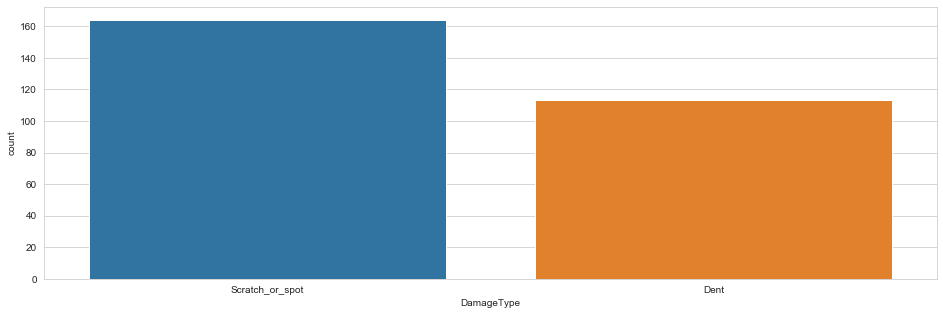

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
sns.countplot(x='DamageType',data=data_2)

In [22]:
img_rows = 224
img_cols = 224

In [23]:
def read_and_prep_images(img_paths, img_height=img_rows, img_width=img_cols):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [24]:
image_paths = data_2['FileLoc']

In [25]:
image_paths

3      Internship/images_chem4/akhand_b43_100.jpg
4      Internship/images_chem4/akhand_b43_101.jpg
9      Internship/images_chem4/akhand_b43_106.jpg
12     Internship/images_chem4/akhand_b43_109.jpg
13      Internship/images_chem4/akhand_b43_11.jpg
14     Internship/images_chem4/akhand_b43_110.jpg
19     Internship/images_chem4/akhand_b43_115.jpg
23     Internship/images_chem4/akhand_b43_119.jpg
25     Internship/images_chem4/akhand_b43_120.jpg
27     Internship/images_chem4/akhand_b43_122.jpg
30     Internship/images_chem4/akhand_b43_125.jpg
31     Internship/images_chem4/akhand_b43_126.jpg
34     Internship/images_chem4/akhand_b43_129.jpg
41     Internship/images_chem4/akhand_b43_135.jpg
42     Internship/images_chem4/akhand_b43_136.jpg
43     Internship/images_chem4/akhand_b43_137.jpg
45     Internship/images_chem4/akhand_b43_139.jpg
48     Internship/images_chem4/akhand_b43_141.jpg
50     Internship/images_chem4/akhand_b43_143.jpg
51     Internship/images_chem4/akhand_b43_144.jpg


In [26]:
train_samples = read_and_prep_images(image_paths)
train_samples.shape

(277, 224, 224, 3)

In [27]:
temp_labels = data_2['DamageType']
temp_labels

3      Scratch_or_spot
4      Scratch_or_spot
9      Scratch_or_spot
12                Dent
13     Scratch_or_spot
14                Dent
19     Scratch_or_spot
23                Dent
25                Dent
27                Dent
30     Scratch_or_spot
31     Scratch_or_spot
34                Dent
41                Dent
42                Dent
43     Scratch_or_spot
45                Dent
48                Dent
50                Dent
51     Scratch_or_spot
53                Dent
54                Dent
64     Scratch_or_spot
67     Scratch_or_spot
68                Dent
81     Scratch_or_spot
84                Dent
85     Scratch_or_spot
86     Scratch_or_spot
87     Scratch_or_spot
            ...       
533    Scratch_or_spot
535               Dent
536    Scratch_or_spot
539    Scratch_or_spot
540               Dent
541               Dent
542    Scratch_or_spot
543               Dent
545               Dent
546    Scratch_or_spot
550               Dent
551    Scratch_or_spot
552        

In [28]:
unique_damages = temp_labels.unique()

In [29]:
unique_damages

array(['Scratch_or_spot', 'Dent'], dtype=object)

In [30]:
labels_dicct = {}
for i in range(length_of_unique_damages):
    labels_dicct[unique_damages[i]] = i
labels_dicct

{'Scratch_or_spot': 0, 'Dent': 1}

In [31]:
def prep_data(raw):
    return keras.utils.to_categorical(raw, length_of_unique_damages)

In [32]:
def change_labels(blob):
    return labels_dicct[blob]

In [33]:
temp_labels = temp_labels.apply(change_labels)
temp_labels

3      0
4      0
9      0
12     1
13     0
14     1
19     0
23     1
25     1
27     1
30     0
31     0
34     1
41     1
42     1
43     0
45     1
48     1
50     1
51     0
53     1
54     1
64     0
67     0
68     1
81     0
84     1
85     0
86     0
87     0
      ..
533    0
535    1
536    0
539    0
540    1
541    1
542    0
543    1
545    1
546    0
550    1
551    0
552    1
556    1
557    0
559    0
560    1
562    0
563    0
565    0
566    1
569    1
578    0
582    1
588    0
593    0
594    1
595    0
596    0
599    0
Name: DamageType, Length: 277, dtype: int64

In [34]:
train_labels = prep_data(temp_labels)
train_labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [35]:
def adjust_images(blob):
    imgs = load_img(blob, target_size=(img_cols, img_rows))
    return(imgs)

In [36]:
data_2['raw_images'] = data_2['FileLoc'].apply(adjust_images)

C:\Users\Guru\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


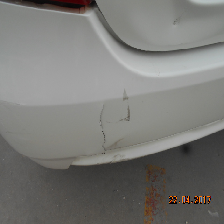

In [37]:
data_2['raw_images'][3]

In [38]:
image_data_generator = ImageDataGenerator(preprocessing_function=preprocess_input,
                                            horizontal_flip = True,
                                             vertical_flip= True,
                                              width_shift_range = 0.2,
                                              height_shift_range = 0.2,
)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_2.drop(['DamageType'],axis=1), data_2['DamageType'], test_size=0.18, random_state=101)

In [41]:
training_data = pd.concat([X_train,y_train],axis=1)
training_data.shape

(227, 4)

In [42]:
test_data = pd.concat([X_test,y_test],axis=1)
test_data.shape

(50, 4)

In [43]:
training_data['DamageType'] = training_data['DamageType'].apply(lambda x: str(x))

In [44]:
training_data.shape

(227, 4)

In [45]:
train_samples.shape

(277, 224, 224, 3)

In [46]:
test_data['DamageType'] = test_data['DamageType'].apply(lambda x: str(x))

In [61]:
image_train_generator=image_data_generator.flow_from_dataframe(dataframe=training_data,x_col="FileName",
                                                  y_col="DamageType", class_mode="categorical",
                                                directory=path_images,
                                                target_size=(256,256),
                                                 batch_size=1)
#color_mode='grayscale'

Found 227 images belonging to 2 classes.


In [48]:
image_train_generator.data_format

'channels_last'

In [49]:
image_test_generator=image_data_generator.flow_from_dataframe(dataframe=test_data,x_col="FileName",
                                                  y_col="DamageType", class_mode="categorical",
                                                directory=path_images,
                                                target_size=(256,256),
                                                 batch_size=1)
#color_mode='grayscale'

Found 50 images belonging to 2 classes.


In [50]:
model = Sequential()
model.add(ResNet50(include_top=False,pooling='avg',weights='imagenet'))
model.add(Dense(units=length_of_unique_damages, activation='softmax'))
model.layers[0].trainable = False
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94658560/94653016 [==============================] - 378s 4us/step


In [51]:
STEP_SIZE_TRAIN=image_train_generator.n//image_train_generator.batch_size
STEP_SIZE_VALID=image_test_generator.n//image_test_generator.batch_size

In [52]:
STEP_SIZE_VALID

50

In [53]:
STEP_SIZE_TRAIN

56

In [58]:
image_train_generator.n,image_test_generator.n,image_test_generator.batch_size,image_train_generator.batch_size

(227, 50, 1, 4)

In [54]:
model.fit(
    x= train_samples ,y= train_labels,
    batch_size = 3,
    epochs = 8,
    validation_split = 0.1,
)

Train on 249 samples, validate on 28 samples
Epoch 1/8
249/249 [==============================] - 75s 300ms/sample - loss: 0.8240 - accuracy: 0.5261 - val_loss: 0.6989 - val_accuracy: 0.6429
Epoch 2/8
249/249 [==============================] - 71s 284ms/sample - loss: 0.6427 - accuracy: 0.6426 - val_loss: 1.2442 - val_accuracy: 0.5714
Epoch 3/8
249/249 [==============================] - 71s 284ms/sample - loss: 0.6445 - accuracy: 0.6426 - val_loss: 1.4712 - val_accuracy: 0.5000
Epoch 4/8
249/249 [==============================] - 71s 284ms/sample - loss: 0.6012 - accuracy: 0.7068 - val_loss: 1.0152 - val_accuracy: 0.5000
Epoch 5/8
249/249 [==============================] - 72s 290ms/sample - loss: 0.5140 - accuracy: 0.7470 - val_loss: 0.8929 - val_accuracy: 0.6071
Epoch 6/8
249/249 [==============================] - 79s 319ms/sample - loss: 0.5094 - accuracy: 0.7470 - val_loss: 0.9258 - val_accuracy: 0.5357
Epoch 7/8
249/249 [==============================] - 74s 296ms/sample - loss: 0

In [59]:
model4 = Sequential()
model4.add(ResNet50(include_top=False,pooling='avg',weights='imagenet'))
model4.add(Dense(units=length_of_unique_damages, activation='softmax'))
model4.layers[0].trainable = False
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [60]:
model4.fit_generator(generator=image_train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=image_test_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=4)

Epoch 1/4
56/56 [==============================] - 76s 1s/step - loss: 0.7864 - accuracy: 0.5157 - val_loss: 0.6138 - val_accuracy: 0.6800
Epoch 2/4
56/56 [==============================] - 74s 1s/step - loss: 0.7619 - accuracy: 0.5580 - val_loss: 0.6510 - val_accuracy: 0.6600
Epoch 3/4
56/56 [==============================] - 80s 1s/step - loss: 0.7202 - accuracy: 0.5605 - val_loss: 0.6404 - val_accuracy: 0.7000
Epoch 4/4
56/56 [==============================] - 87s 2s/step - loss: 0.6748 - accuracy: 0.6126 - val_loss: 0.6538 - val_accuracy: 0.7200
